# Preventing Employee Attrition: Modeling the HR Analytics dataset

### (1) Data Description:

The `HR Analytics` dataset (openly avaliable on Kaggle: [HR Analytics](https://www.kaggle.com/datasets/rishikeshkonapure/hr-analytics-prediction)) is a collection of corporate organizational survey data on employee information. In totality, the dataset contains 35 variables, collected through a survey of 1470 employees who worked in various departments at IBM, a large industrial research organization. The downloaded dataset contains either numeric or character type variables, which should be adjusted during EDA. The following table organizes the variable names and descriptions within the survey dataset.





| **Attribute**              | **Description**                                       | **Attribute**              | **Description**                                       |
|----------------------------|-------------------------------------------------------|----------------------------|-------------------------------------------------------|
| **Age**                    | Age of the employee (in years)                        | **Attrition**              | Whether the employee left (Yes/No)                    |
| **BusinessTravel**         | Frequency of job-related travel        | **DailyRate**              | Daily rate of pay (in USD)                 |
| **Department**             | Department where the employee works                   | **DistanceFromHome**       | Distance from home to work (in miles)                 |
| **Education**              | Level of education (1-5)                              | **EducationField**         | Field of study                                        |
| **EmployeeCount**          | Number of employees (always 1 for each entry)         | **EmployeeNumber**         | Employee number                                       |
| **EnvironmentSatisfaction**| Environment satisfaction (1-4)                        | **Gender**                 | Gender of the employee                                |
| **HourlyRate**             | Hourly rate of pay (in USD)                | **JobInvolvement**         | Job involvement rating (1-4)                          |
| **JobLevel**               | Job level (1-5)                                       | **JobRole**                | Job role                                              |
| **JobSatisfaction**        | Job satisfaction rating (1-4)                         | **MaritalStatus**          | Marital status                                        |
| **MonthlyIncome**          | Monthly income (in USD)                    | **MonthlyRate**            | Monthly rate (in USD units)                      |
| **NumCompaniesWorked**     | Number of companies worked at                         | **Over18**                 | Indicator if over 18 years old (Yes)                  |
| **OverTime**               | Overtime status (Yes/No)                              | **PercentSalaryHike**      | Salary increment percentage                           |
| **PerformanceRating**      | Performance rating (1-4)                              | **RelationshipSatisfaction**| Relationship satisfaction (1-4)                       |
| **StandardHours**          | Standard hours worked (always 8)                      | **StockOptionLevel**       | Stock option level (0-3)                              |
| **TotalWorkingYears**      | Total working years                                   | **TrainingTimesLastYear**  | Training times last year                              |
| **WorkLifeBalance**        | Work-life balance rating (1-4)                        | **YearsAtCompany**         | Years at the company                                  |
| **YearsInCurrentRole**     | Years in current role                                 | **YearsSinceLastPromotion**| Years since last promotion                            |
| **YearsWithCurrManager**   | Years with current manager                            |                            |                                                       |


### (2) Key Question:

One of the biggest problems faced by companies is employee attrition. Companies benefit greatly from keeping employees on board, and preventing employee attrition. The main question will be to predict whether an employee is going to leave, so that the company can take preventitve measures. Relating this question to our data set, the response variable will be `Attrition`. However, there are many covariates that could be used for input. According to the Harvard Business Review, the main factors impacting employee attrition are job satisfaction and the job environment (1). The more satisfied someone is with their job, and the more comfortable they are in their environment, the more likely they are to stay. Some covariates in the dataset that could be associated with these issues are `JobSatisfaction`, `EnvironmentSatisfaction`, `Department`, `DistanceFromHome`, and `WorkLifeBalance`. Another study conducted about Sri Lankan startups found that age, gender, and managerial relationship are large contributors towards an employee's decision to stay or leave (2). In addition to these ideas, we will also investigate the relationships in our dataset with some visualizations to help narrow down our input covariates.

### (3) Exploratory Data Analysis and Visualization

In [1]:
#Read in libraries
library(repr)
library(infer)
library(broom)
library(cowplot)
library(GGally)
library(modelr)
library(tidyverse)
library(tidymodels)
library(ggpubr)
library(glmnet)
library(pROC)
library(caret)
library(MASS)

Loading required package: ggplot2

Registered S3 method overwritten by 'GGally':
  method from   
  +.gg   ggplot2


Attaching package: ‘modelr’


The following object is masked from ‘package:broom’:

    bootstrap


── Attaching core tidyverse packages ──────────────────────── tidyverse 2.0.0 ──
✔ dplyr     1.1.4     ✔ readr     2.1.5
✔ forcats   1.0.0     ✔ stringr   1.5.1
✔ lubridate 1.9.3     ✔ tibble    3.2.1
✔ purrr     1.0.2     ✔ tidyr     1.3.1
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ modelr::bootstrap() masks broom::bootstrap()
✖ dplyr::filter()     masks stats::filter()
✖ dplyr::lag()        masks stats::lag()
✖ lubridate::stamp()  masks cowplot::stamp()
ℹ Use the conflicted package (<http://conflicted.r-lib.org/>) to force all conflicts to become errors
── Attaching packages ────────────────────────────────────── tidymodels 1.2.0 ──

✔ dials        1.3.0     ✔ tune         1.2.1
✔ modeldata    1.4.0     ✔ workflows    1.1.4
✔ parsni

First, we will load the dataset from the web, and fix the column names.

In [2]:
#Load data from web
HR_data <- read_csv("https://raw.githubusercontent.com/mnvibhakar/STAT301_project/main/HR-Employee-Attrition.csv")
#get list of variables in the data set, and set the column names to the names of the variables
colnames(HR_data) <- make.names(colnames(HR_data))
#preview data
head(HR_data)

Rows: 1470 Columns: 35
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr  (9): Attrition, BusinessTravel, Department, EducationField, Gender, Job...
dbl (26): Age, DailyRate, DistanceFromHome, Education, EmployeeCount, Employ...

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,⋯,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
<dbl>,<chr>,<chr>,<dbl>,<chr>,<dbl>,<dbl>,<chr>,<dbl>,<dbl>,⋯,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,⋯,1,80,0,8,0,1,6,4,0,5
49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,⋯,4,80,1,10,3,3,10,7,1,7
37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,⋯,2,80,0,7,3,3,0,0,0,0
33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,⋯,3,80,0,8,3,3,8,7,3,0
27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,⋯,4,80,1,6,3,3,2,2,2,2
32,No,Travel_Frequently,1005,Research & Development,2,2,Life Sciences,1,8,⋯,3,80,0,8,2,2,7,7,3,6


Next, by examining the data we can see that there are some unnecessary columns, namely `EmployeeCount` which has a value of 1 for all observations, `StandardHours` which has a value of 80 for all observations, `Over18` which has a value of Yes for all observations, and `EmployeeNumber` which acts as an ID column and has no bearing on the relationships found in the data.

In [3]:
#deselct unnecessary columns
HR_data <- HR_data |>
    dplyr::select(-EmployeeCount, -StandardHours, -Over18, -EmployeeNumber)

To allow us to do analysis with `Attrition` as our response variable, we will make it into a numerical variable.

In [4]:
#Set Attrition to a numerical Variable
HR_data <- HR_data |>
    mutate(Attrition = if_else(Attrition == "Yes", 1, 0))

#### Visualization

To help us analyze the relationships in the data, we will analyze a correlation matrix heat map. This will help us determine if any variables are highly correlated, and therefore too similar to eachother to include both in our model.

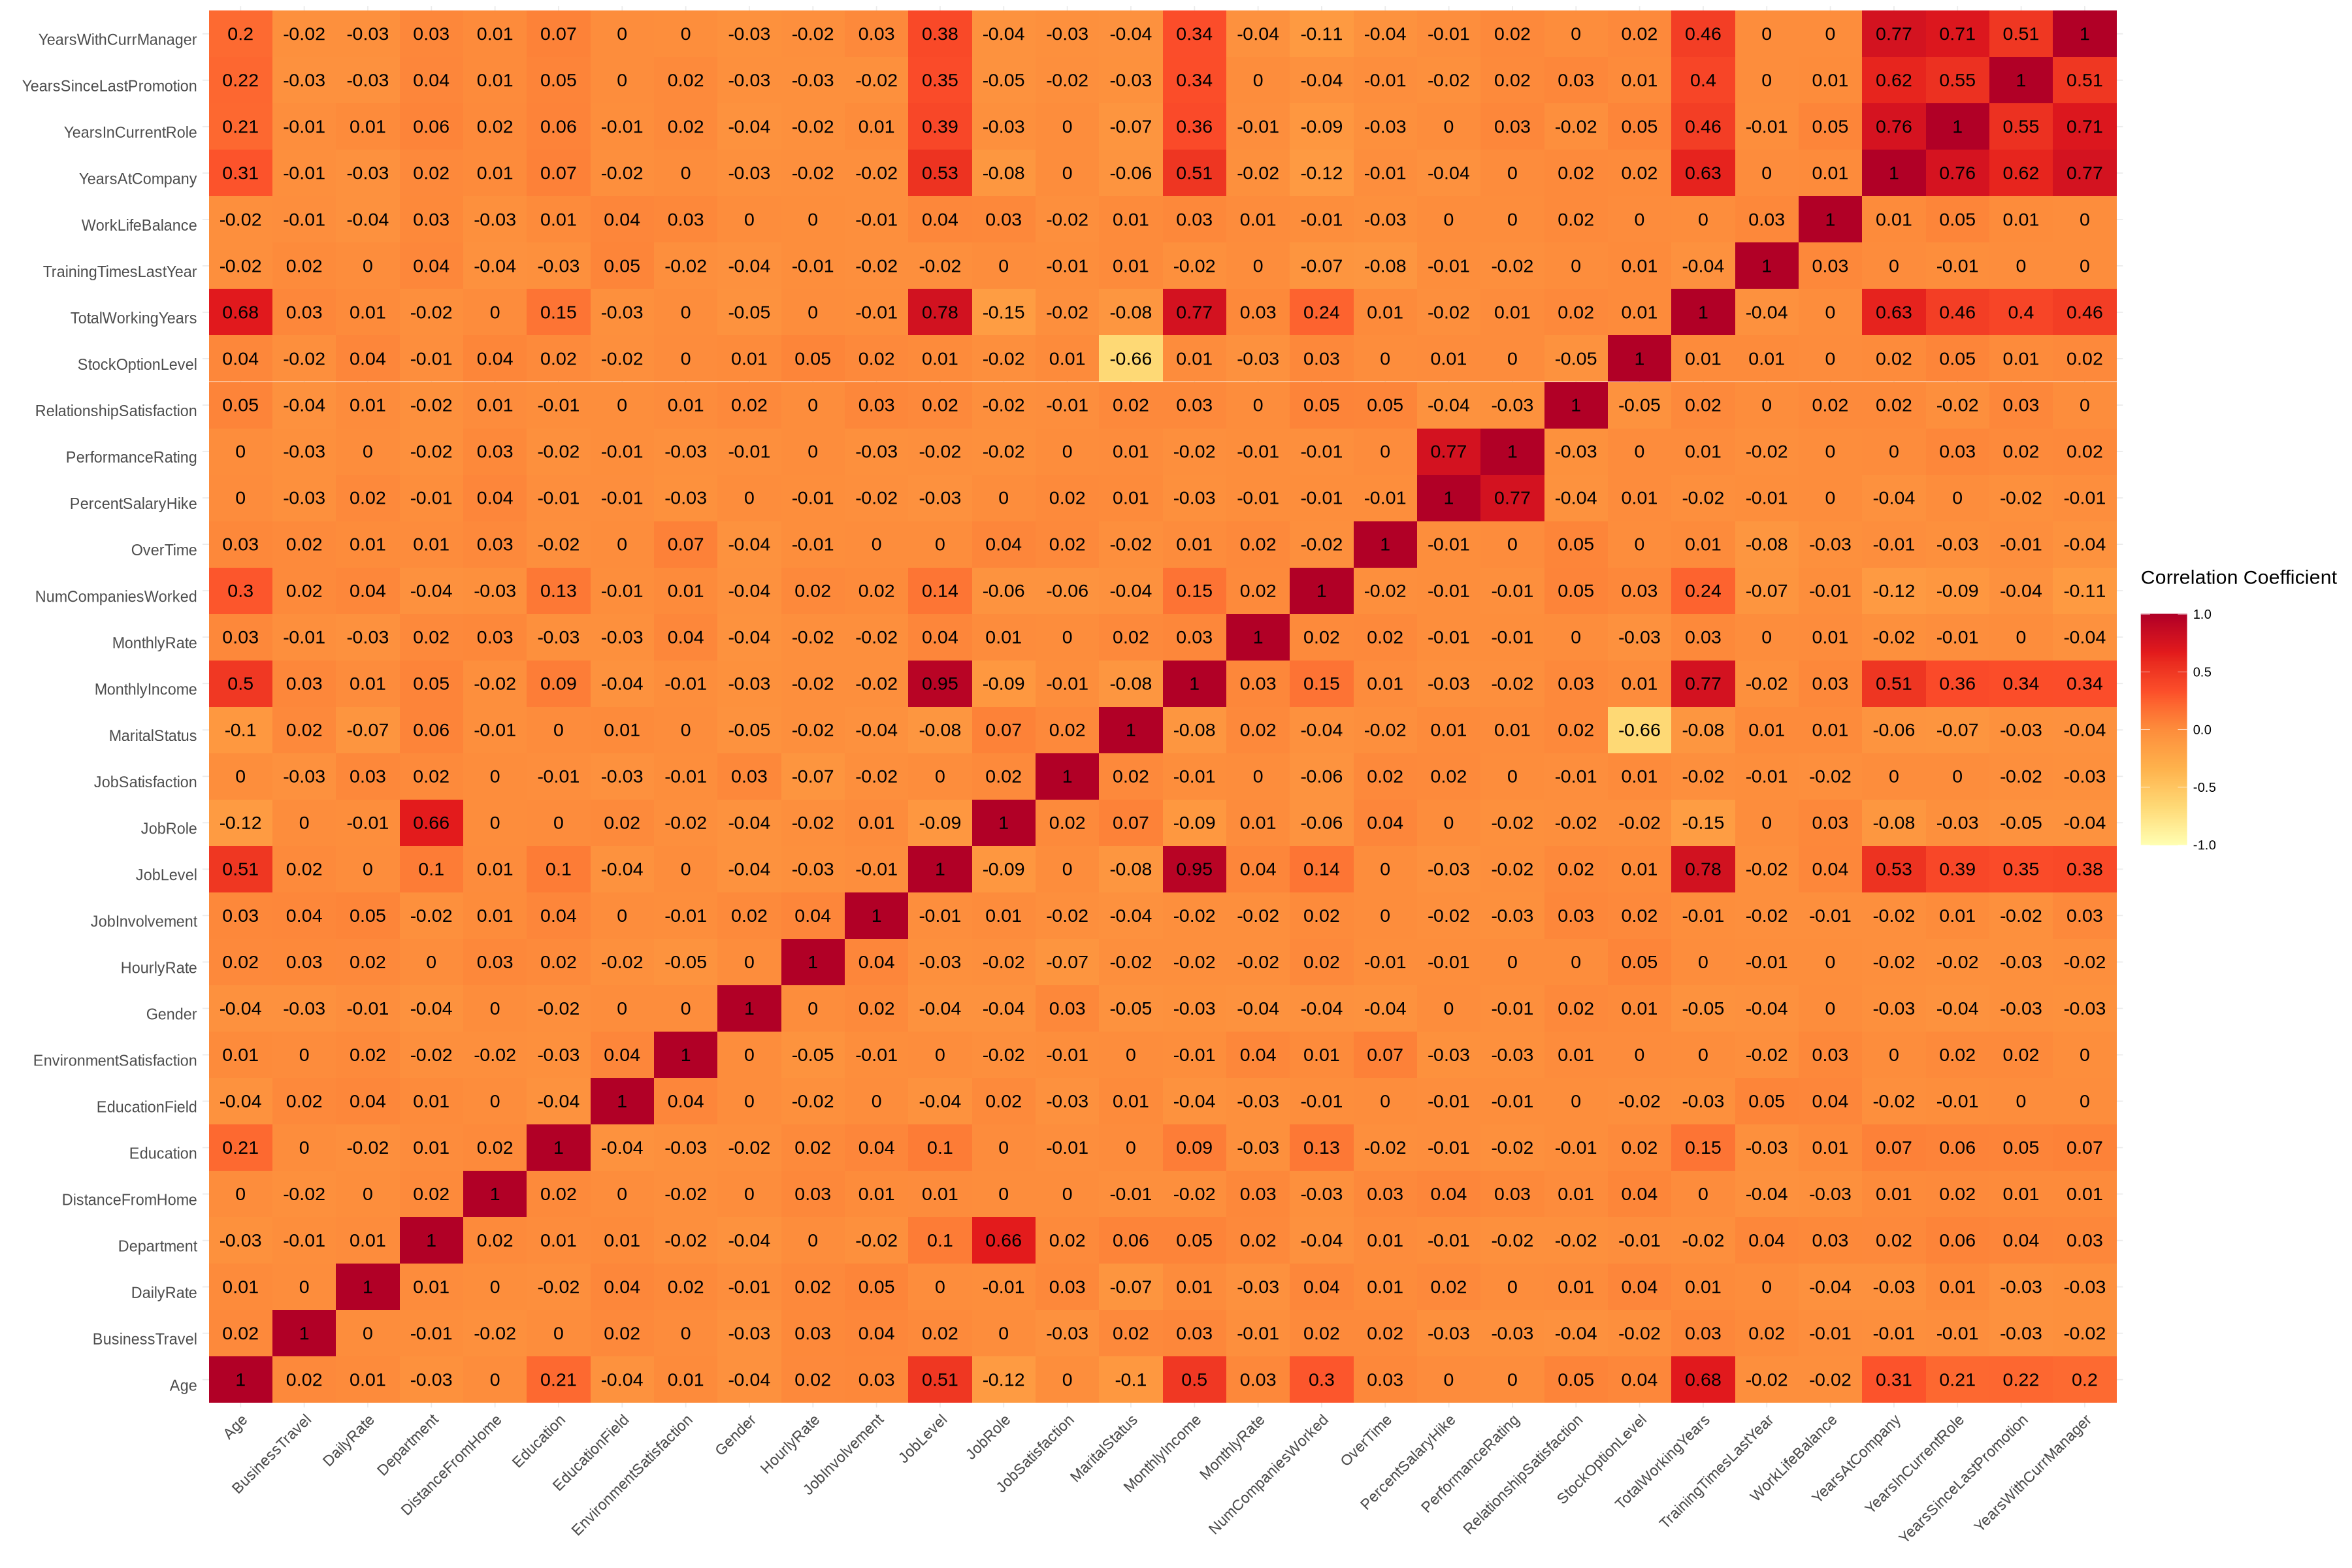

In [5]:
#find correlation values for all possible input variables
corr_matrix_HR <- HR_data |>
    dplyr::select(-Attrition) |>
    filter(na.rm = TRUE) |>
    data.matrix() |>
    cor() |>
    as_tibble(rownames = 'var1') |>
    pivot_longer(-var1, names_to = "var2", values_to = "corr")
#plot heat map of correlation matrix
plot_corr_matrix_HR <- corr_matrix_HR |>
    ggplot(aes(x = var1, y = var2)) +
    geom_tile(aes(fill = corr)) +
    scale_fill_distiller("Correlation Coefficient \n",
      palette =  "YlOrRd",
      direction = 1, 
      limits = c(-1, 1)) +
    labs(x = "", y = "") +
    theme_minimal() +
    theme(
        axis.text.x = element_text(angle = 45, vjust = 1, size = 14, hjust = 1),
        axis.text.y = element_text(vjust = 1, size = 14, hjust = 1),
        legend.title = element_text(size = 18),
        legend.text = element_text(size = 12),
        legend.key.size = unit(1.5, "cm")
    ) +
    geom_text(aes(x = var1, y = var2, label = round(corr, 2)), color = "black", size = 6)
options(repr.plot.width = 30, repr.plot.height = 20) 
plot_corr_matrix_HR

In [6]:
#Create table that displays variables with highest overall correlation
corr_matrix_results_HR <- corr_matrix_HR |>
    group_by(var1) |>
    summarize(sum = sum(corr)) |>
    arrange(desc(sum))
corr_matrix_results_HR

var1,sum
<chr>,<dbl>
TotalWorkingYears,5.3076203
JobLevel,5.0207258
MonthlyIncome,4.8607550
YearsAtCompany,4.8161515
YearsInCurrentRole,4.4156374
YearsWithCurrManager,4.1466272
Age,4.0164702
YearsSinceLastPromotion,3.8835439
Department,1.9392794


From the heat map and correlation table, we can see that there are a number of variables that demonstrate multicollinearity. `YearsWithCurrManager`, `YearsInCurrRole`, `YearsAtCompany`, and `YearsSinceLastPromotion` are all highly correlated with eachother, as well as with `JobLevel` and `MonthlyIncome`. We can also see that `TotalWorkingYears` and `Age` also have high correlation values. Considering this, it makes sense to only consider one or two of these variables as an input for our model.

- Since our question concerns the factors that contributes to higher attrition among employees, visualizations that illustrate the differences between those who had resigned (or terminated, 'Yes' in `Attrition`) and those who stayed in the company ('No' in `Attrition`) in the variables identified by our background research.

- To illustrate the differences, we can employ violinplots overlayed by boxplot.

- To aid visualization, we will create a version of the dataset with `Attrition` as a factor

In [7]:
#set Attrition to be a factor
HR_vis_data <- HR_data |>
    mutate(Attrition = as.factor(Attrition))

In [8]:
#create violin plot for age v Attrition
Age_Vlnplot <- HR_vis_data |>
ggplot(aes(x = Attrition, y = Age, color = Attrition)) +
    geom_violin(trim = FALSE) +
    geom_boxplot(width = 0.1) +
    stat_summary(fun = mean, geom = "point", size = 2, color = "blue") +
    labs(x = "Employee Attrition (Yes/No)",
         y = "Age (years)",
         title = "Age vs Attrition") +
    theme(text = element_text(size = 15))

In [9]:
#create violin plot for JobSatisfaction v Attrition
JobSatisfaction_Vlnplot <- HR_vis_data |>
ggplot(aes(x = Attrition, y = JobSatisfaction, color = Attrition)) +
    geom_violin(trim = FALSE) +
    geom_boxplot(width = 0.1) +
    stat_summary(fun = mean, geom = "point", size = 2, color = "blue") +
    labs(x = "Employee Attrition (Yes/No)",
         y = "Job Satisfaction (scale from 1-4)",
         title = "Job Satisfaction vs Attrition") +
    theme(text = element_text(size = 15))

In [10]:
#create violin plot for Department v Attrition
Department_Vlnplot <- HR_vis_data |>
ggplot(aes(x = Attrition, y = Department, color = Attrition)) +
    geom_violin(trim = FALSE) +
    geom_boxplot(width = 0.1) +
    labs(x = "Employee Attrition (Yes/No)",
         y = "Department",
         title = "Department vs Attrition") +
    theme(text = element_text(size = 15))

In [11]:
#create violin plot for DistanceFromHome v Attrition
DistanceFromHome_Vlnplot <- HR_vis_data |>
ggplot(aes(x = Attrition, y = DistanceFromHome, color = Attrition)) +
    geom_violin(trim = FALSE) +
    geom_boxplot(width = 0.1) +
    stat_summary(fun = mean, geom = "point", size = 2, color = "blue") +
    labs(x = "Employee Attrition (Yes/No)",
         y = "DistanceFromHome (km))",
         title = "Distance From Home vs Attrition") +
    theme(text = element_text(size = 15))

In [12]:
#create violin plot for WorkLifeBalance v Attrition
WorkLifeBalance_Vlnplot <- HR_vis_data |>
ggplot(aes(x = Attrition, y = WorkLifeBalance, color = Attrition)) +
    geom_violin(trim = FALSE) +
    geom_boxplot(width = 0.1) +
    stat_summary(fun = mean, geom = "point", size = 2, color = "blue") +
    labs(x = "Employee Attrition (Yes/No)",
         y = "Work Life Balance (scale from 1-4)",
         title = "Work Life Balance vs Attrition") +
    theme(text = element_text(size = 15))

In [13]:
#create violin plot for Gender v Attrition
Gender_Vlnplot <- HR_vis_data |>
ggplot(aes(x = Attrition, y = Gender, color = Attrition)) +
    geom_violin(trim = FALSE) +
    geom_boxplot(width = 0.1) +
    labs(x = "Employee Attrition (Yes/No)",
         y = "Gender",
         title = "Gender vs Attrition") +
    theme(text = element_text(size = 15))

In [14]:
#create violin plot for EnvironmentSatisfaction v attrition
EnvironmentSatisfaction_Vlnplot <- HR_vis_data |>
ggplot(aes(x = Attrition, y = EnvironmentSatisfaction, color = Attrition)) +
    geom_violin(trim = FALSE) +
    geom_boxplot(width = 0.1) +
    stat_summary(fun = mean, geom = "point", size = 2, color = "blue") +
    labs(x = "Employee Attrition (Yes/No)",
         y = "Environment Satisfaction (scale of 1-4)",
         title = "Environment vs Attrition") +
    theme(text = element_text(size = 15))

Additionally, we will also create violin plots for some of the variables identified in our correlation analysis to determine which, if any, to include in our analysis.

In [15]:
#create violin plot for MonthlyIncome v Attrition
MonthlyIncome_Vlnplot <- HR_vis_data |>
ggplot(aes(x = Attrition, y = MonthlyIncome, color = Attrition)) +
    geom_violin(trim = FALSE) +
    geom_boxplot(width = 0.1) +
    stat_summary(fun = mean, geom = "point", size = 2, color = "blue") +
    labs(x = "Employee Attrition (Yes/No)",
         y = "Monthly Income (USD)",
         title = "Monthly Income vs Attrition") +
    theme(text = element_text(size = 15))

In [16]:
#create violin plot for YearsWithCurrManager v Attrition
YearsWithCurrManager_Vlnplot <- HR_vis_data |>
ggplot(aes(x = Attrition, y = YearsWithCurrManager, color = Attrition)) +
    geom_violin(trim = FALSE) +
    geom_boxplot(width = 0.1) +
    stat_summary(fun = mean, geom = "point", size = 2, color = "blue") +
    labs(x = "Employee Attrition (Yes/No)",
         y = "Years With Current Manager",
         title = "Years With Current Manager vs Attrition") +
    theme(text = element_text(size = 15))

In [17]:
#create violin plot for JobLevel v Attrition
JobLevel_Vlnplot <- HR_vis_data |>
ggplot(aes(x = Attrition, y = JobLevel, color = Attrition)) +
    geom_violin(trim = FALSE) +
    geom_boxplot(width = 0.1) +
    stat_summary(fun = mean, geom = "point", size = 2, color = "blue") +
    labs(x = "Employee Attrition (Yes/No)",
         y = "Job Level (scale of 1-4)",
         title = "Job Level vs Attrition") +
    theme(text = element_text(size = 15))

In [18]:
#create violin plot for TotalWorkingYears v Attrition
TotalWorkingYears_Vlnplot <- HR_vis_data |>
ggplot(aes(x = Attrition, y = TotalWorkingYears, color = Attrition)) +
    geom_violin(trim = FALSE) +
    geom_boxplot(width = 0.1) +
    stat_summary(fun = mean, geom = "point", size = 2, color = "blue") +
    labs(x = "Employee Attrition (Yes/No)",
         y = "Total Working Years",
         title = "Total Working Years vs Attrition") +
    theme(text = element_text(size = 15))

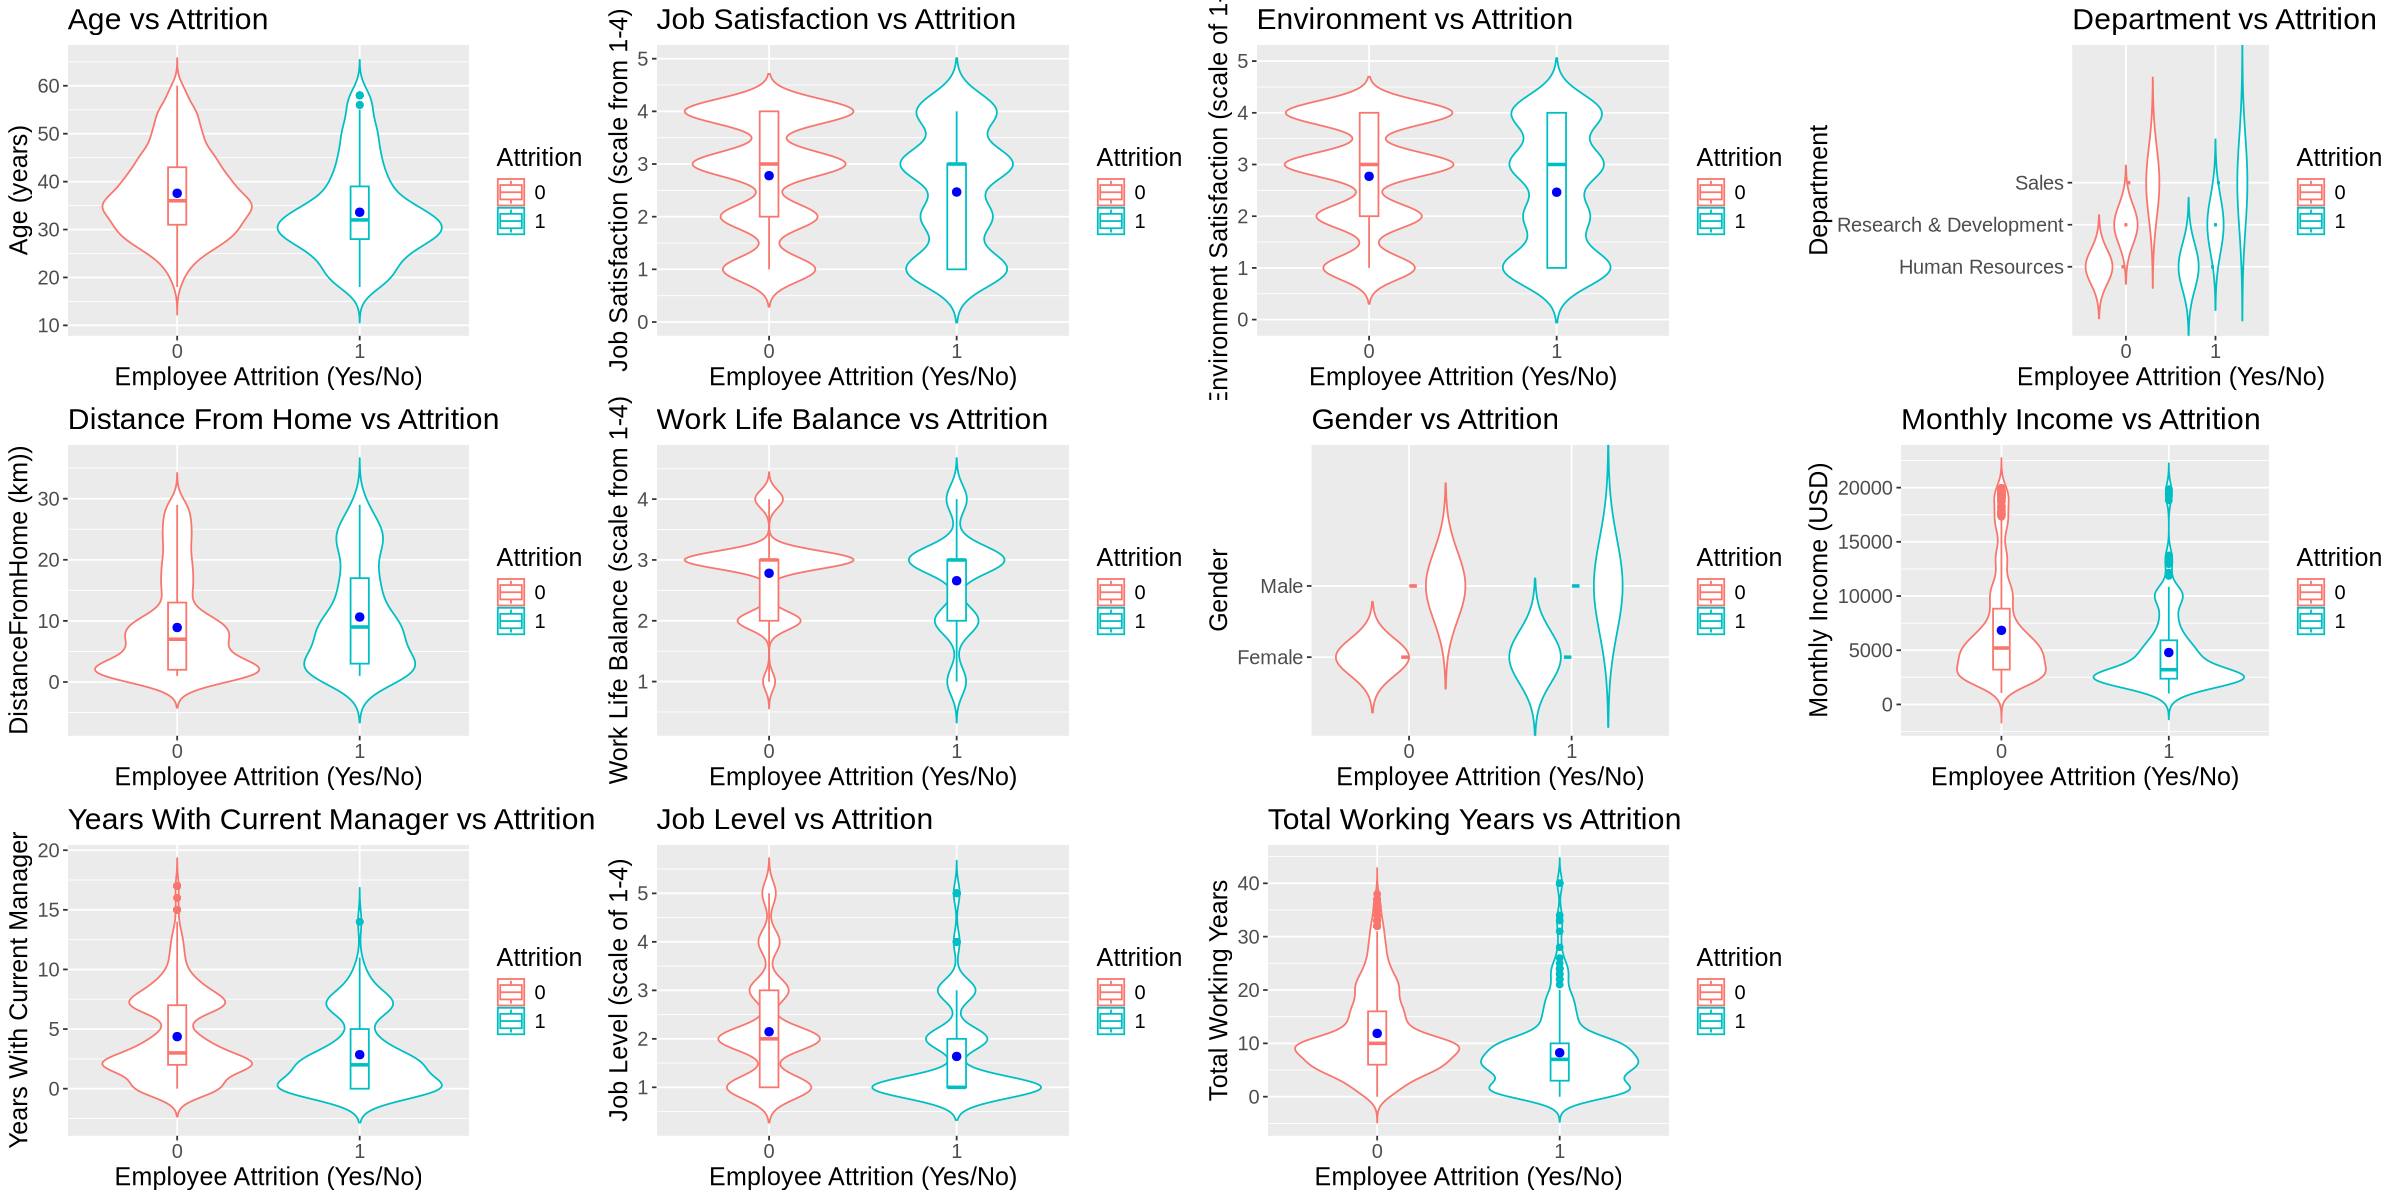

In [19]:
#set plot options for visibilty
options(repr.plot.width = 20, repr.plot.height = 10) 

#display plots side by side
ggarrange(Age_Vlnplot, JobSatisfaction_Vlnplot, EnvironmentSatisfaction_Vlnplot, Department_Vlnplot, DistanceFromHome_Vlnplot,
          WorkLifeBalance_Vlnplot, Gender_Vlnplot, MonthlyIncome_Vlnplot, YearsWithCurrManager_Vlnplot, JobLevel_Vlnplot,
          TotalWorkingYears_Vlnplot)

#### Takeaways
From our visualizations we can see that there aren't major differences for most of the variables we analyzed. These patterns found in the plots indicate that employee attrition can't be attributed to one single variable. As for which variables we should analyze, based on the plots `MonthlyIncome` appears to be the best of the highly correlated variables. Based on the plots and our background research, we will select the variables `Age`, `MonthlyIncome`, `JobSatisfaction`, `EnvironmentSatisfaction`, and `DistanceFromHome` for one of our models

### (4) Methods and Plan

Given the binary and predictive nature of our question, we will first split our data into a training, validation, and testing set, then fit multiple logistic regression models as follows:
* Model 1: fit a glm using the input covariates `Age`,`MonthlyIncome`, `JobSatisfaction`, `EnvironmentSatisfaction`, and `DistanceFromHome`, chosen based on our background research and visualizations.
* Model 2: Use LASSO for variable selection, then perform logistic regression with the selected variables
* Model 3: Use a forward selection algorithm to select variables

Then we will compare our models' performance on the validation data using confusion matrices and AUC measure. Finally we will select a model based on the comparisons and assess its performance on the testing data.

### (5) Data Analysis

First, we need to split our data into training, validation, and testing sets. This allows us to properly assess our model later and see how it performs on unknown data.

In [20]:
#Set seed for reproducibility
set.seed(19)

#Split the data into a training and a testing set
HR_split <- initial_split(HR_data, prop = 0.7, strata = Attrition)
HR_train <- training(HR_split)
HR_test <- testing(HR_split)

#split the training set into a training and a validation set
validation_split <- initial_split(HR_train, prop = 0.7, strata = Attrition)
HR_train <- training(validation_split)
HR_validate <- testing(validation_split)

#### Model 1: Variables Selected Through EDA and Background

Next, we will train a logistic regression model using the 5 covariates we selected based on the EDA and background research.

In [21]:
#Train logistic regression model with the selected covariates
HR_selected_model <- glm(formula = Attrition ~ Age + JobSatisfaction + EnvironmentSatisfaction + DistanceFromHome + MonthlyIncome,
                         family = binomial, data = HR_train)


To get an idea of how well this model is performing, we will analyze the confusion matrix and ROC plot

Setting levels: control = 0, case = 1

Setting direction: controls < cases



Confusion Matrix and Statistics

          Reference
Prediction   0   1
         0 256  49
         1   3   1
                                          
               Accuracy : 0.8317          
                 95% CI : (0.7852, 0.8717)
    No Information Rate : 0.8382          
    P-Value [Acc > NIR] : 0.6557          
                                          
                  Kappa : 0.0134          
                                          
 Mcnemar's Test P-Value : 4.365e-10       
                                          
            Sensitivity : 0.020000        
            Specificity : 0.988417        
         Pos Pred Value : 0.250000        
         Neg Pred Value : 0.839344        
             Prevalence : 0.161812        
         Detection Rate : 0.003236        
   Detection Prevalence : 0.012945        
      Balanced Accuracy : 0.504208        
                                          
       'Positive' Class : 1               
                              

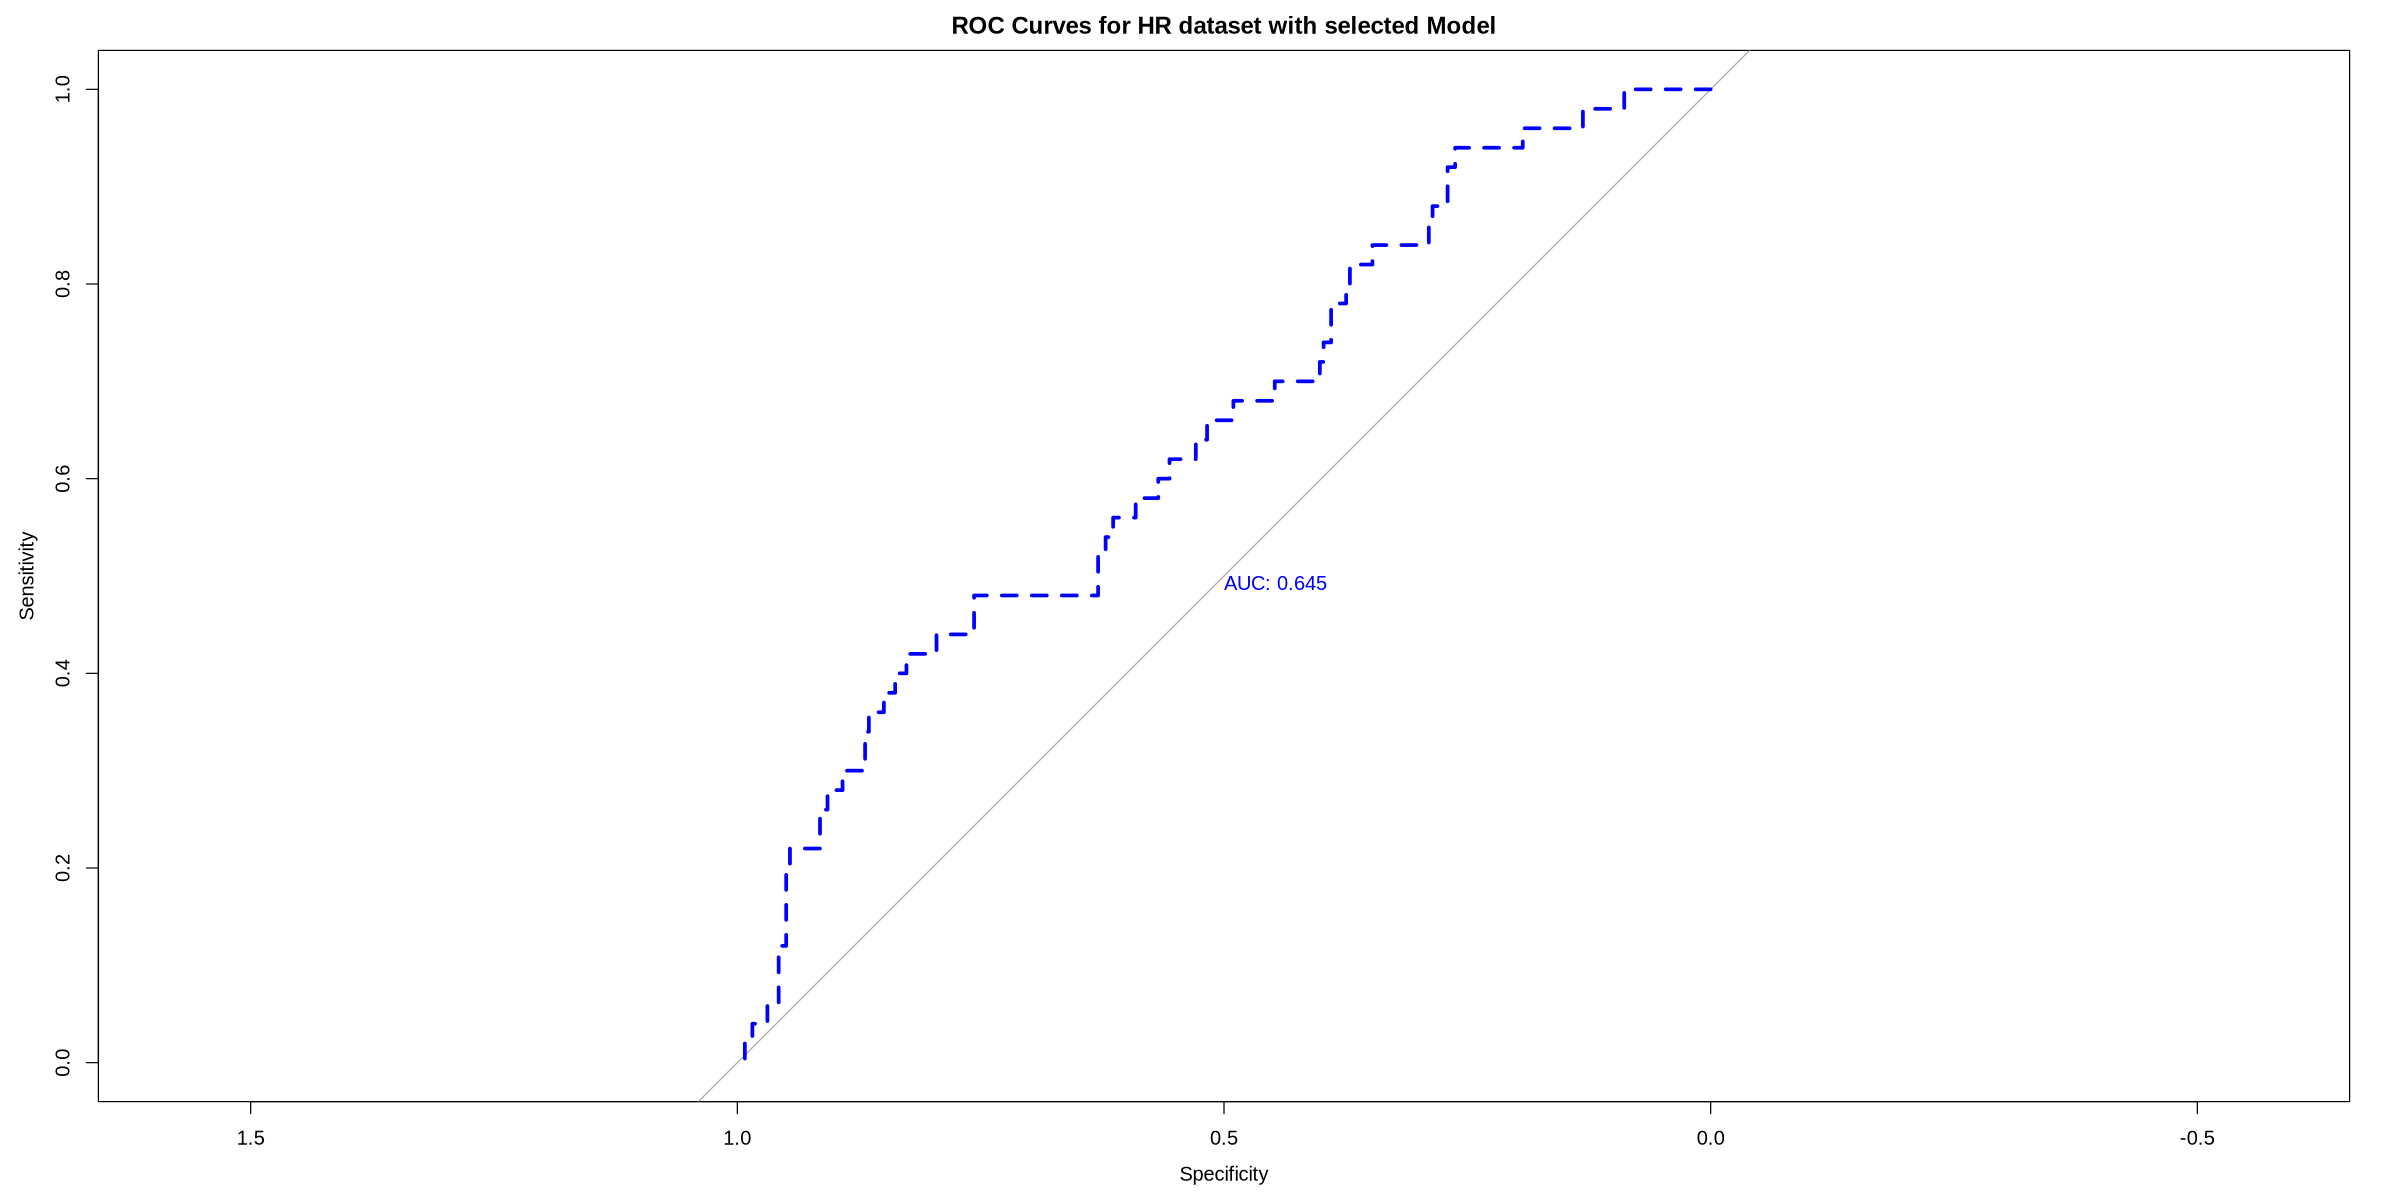

In [22]:
#obtain Confusion matrix and ROC plots for the model with a classification threshold of 0.5
HR_selected_confusion_matrix <- 
    confusionMatrix(
    data = as.factor(round(predict(HR_selected_model, HR_validate, type = 'response'), 0)),
    reference = as.factor(HR_validate$Attrition),
    positive = '1'
)
ROC_selected_log <- roc(response = as.factor(HR_validate$Attrition),
                        predictor = predict(HR_selected_model, HR_validate, type = 'response'))

HR_selected_confusion_matrix
plot(ROC_selected_log,
  print.auc = TRUE, col = "blue", lwd = 3, lty = 2,
  main = "ROC Curves for HR dataset with selected Model"
)

It is clear that right now, the model isn't doing very well, as it simply predicts that almost every employee will stay. Obviously this isn't the case and can be seen in the relatively low accuracy. To compensate for this, we can decrease our threshold for classification. Right now, if the odds are above 0.5 we classify attrition as 'yes', however if we lower that threshold we can more accurately assess the performance of our model. This is supported by background knowledge. Even if an employee is less than 50% likely to quit, it may still be worth taking steps to ensure that it doesn't get worse and keep them around. The threshold at which to take action can be determined by doing analysis on the accuracy of the model as well as the costs associated with taking action, and determing at what point it becomes worth it.

We will lower the threshold to 0.35 and check the confusion matrix

In [23]:
#obtain Confusion matrix and ROC plots for the model with a classification threshold of 0.25
HR_selected_confusion_matrix <- 
    confusionMatrix(
    data = as.factor(as.integer(predict(HR_selected_model, HR_validate, type = 'response') > 0.35)),
    reference = as.factor(HR_validate$Attrition),
    positive = '1'
)
HR_selected_confusion_matrix

Confusion Matrix and Statistics

          Reference
Prediction   0   1
         0 246  42
         1  13   8
                                         
               Accuracy : 0.822          
                 95% CI : (0.7747, 0.863)
    No Information Rate : 0.8382         
    P-Value [Acc > NIR] : 0.8036133      
                                         
                  Kappa : 0.1434         
                                         
 Mcnemar's Test P-Value : 0.0001597      
                                         
            Sensitivity : 0.16000        
            Specificity : 0.94981        
         Pos Pred Value : 0.38095        
         Neg Pred Value : 0.85417        
             Prevalence : 0.16181        
         Detection Rate : 0.02589        
   Detection Prevalence : 0.06796        
      Balanced Accuracy : 0.55490        
                                         
       'Positive' Class : 1              
                                         

It is evident that lowering the threshold doesn't make this model any better, as the accuracy actually decreases. Overall, it could still be sondiered better than the previous model because it at least gives us more relvant predictions and information. The AUC is also quite low for this model, at only 0.645. There is still room for improvement and a different model may be better. Next, we will use LASSO for variable selection to fit a second model.

#### Model 2: Variables Selected by LASSO

To start, we must adjust the format of our data so it is usable with the functions we need.

In [24]:
#prepare data for glmnet function
model_matrix_X_train <- model.matrix(Attrition ~ .,HR_train)
model_matrix_X_train <- model_matrix_X_train[, colnames(model_matrix_X_train) != "(Intercept)"]
matrix_Y_train <- as.matrix(HR_train$Attrition, ncols = 1)

#format validation set as a matrix
model_matrix_X_validate <- model.matrix(Attrition ~ ., HR_validate)
model_matrix_X_validate <- model_matrix_X_validate[, colnames(model_matrix_X_validate) != "(Intercept)"]
matrix_Y_validate <- as.matrix(HR_validate$Attrition, ncols = 1)

Next, we will perform cross-validation to determine the best $\lambda$ to use in our model. To reduce the complexity of our model, we will use the lambda that maximiazes AUC within 1 standard error as opposed to the overall maximum AUC.

In [25]:
#find the lambda that maximizes AUC, within 1 standard error to minimize complexity
set.seed(19)
HR_LASSO_lambda_cv <- cv.glmnet(
    x = model_matrix_X_train, y = matrix_Y_train,
    alpha = 1,
    family = "binomial",
    type.measure = "auc",
    nfolds = 5)
HR_LASSO_lambda <- HR_LASSO_lambda_cv$lambda.1se
HR_LASSO_lambda_cv
HR_LASSO_lambda


Call:  cv.glmnet(x = model_matrix_X_train, y = matrix_Y_train, type.measure = "auc",      nfolds = 5, alpha = 1, family = "binomial") 

Measure: AUC 

      Lambda Index Measure      SE Nonzero
min 0.006183    30  0.8079 0.02063      28
1se 0.020724    17  0.7882 0.01799      19

[1] 0.0207235

Now that we have found our $\lambda$, we will fit a LASSO logistic model with that $\lambda$. 

In [26]:
#fit a model using the lambda found
HR_LASSO_model <- glmnet(
    x = model_matrix_X_train,
    y = matrix_Y_train,
    family = "binomial",
    lambda = HR_LASSO_lambda)
#display the coefficients in our model
LASSO_coef <- coef(HR_LASSO_model)
LASSO_coef

45 x 1 sparse Matrix of class "dgCMatrix"
                                            s0
(Intercept)                       6.037875e-01
Age                              -3.015663e-02
BusinessTravelTravel_Frequently   1.245022e-01
BusinessTravelTravel_Rarely       .           
DailyRate                         .           
DepartmentResearch & Development  .           
DepartmentSales                   .           
DistanceFromHome                  6.216036e-03
Education                         .           
EducationFieldLife Sciences       .           
EducationFieldMarketing           2.790125e-01
EducationFieldMedical             .           
EducationFieldOther               .           
EducationFieldTechnical Degree    4.004894e-01
EnvironmentSatisfaction          -2.520823e-01
GenderMale                        1.152443e-01
HourlyRate                        .           
JobInvolvement                   -1.120493e-01
JobLevel                          .           
JobRoleHuman Resou

Next, we will fit a standard logistic regression model using the variables selected by LASSO.

In [27]:
#reduce training and validation sets to selected variables
HR_train_selected <- HR_train |>
    dplyr::select(Attrition, Age, BusinessTravel, DistanceFromHome, EducationField, EnvironmentSatisfaction, Gender, JobInvolvement,
           JobRole, JobSatisfaction, MaritalStatus, OverTime, RelationshipSatisfaction, TrainingTimesLastYear, YearsWithCurrManager)
HR_validate_selected <- HR_validate |>
    dplyr::select(Attrition, Age, BusinessTravel, DistanceFromHome, EducationField, EnvironmentSatisfaction, Gender, JobInvolvement,
           JobRole, JobSatisfaction, MaritalStatus, OverTime, RelationshipSatisfaction, TrainingTimesLastYear, YearsWithCurrManager)

#Fit model on training data
HR_LASSO_selected_model <- glm(formula = Attrition ~ ., family = binomial, data = HR_train_selected)

Now that we have a model, we can assess its performance by looking at the confusion matrix and ROC plot.

Confusion Matrix and Statistics

          Reference
Prediction   0   1
         0 253  34
         1   6  16
                                          
               Accuracy : 0.8706          
                 95% CI : (0.8279, 0.9059)
    No Information Rate : 0.8382          
    P-Value [Acc > NIR] : 0.06808         
                                          
                  Kappa : 0.3835          
                                          
 Mcnemar's Test P-Value : 1.963e-05       
                                          
            Sensitivity : 0.32000         
            Specificity : 0.97683         
         Pos Pred Value : 0.72727         
         Neg Pred Value : 0.88153         
             Prevalence : 0.16181         
         Detection Rate : 0.05178         
   Detection Prevalence : 0.07120         
      Balanced Accuracy : 0.64842         
                                          
       'Positive' Class : 1               
                              

Setting levels: control = 0, case = 1

Setting direction: controls < cases



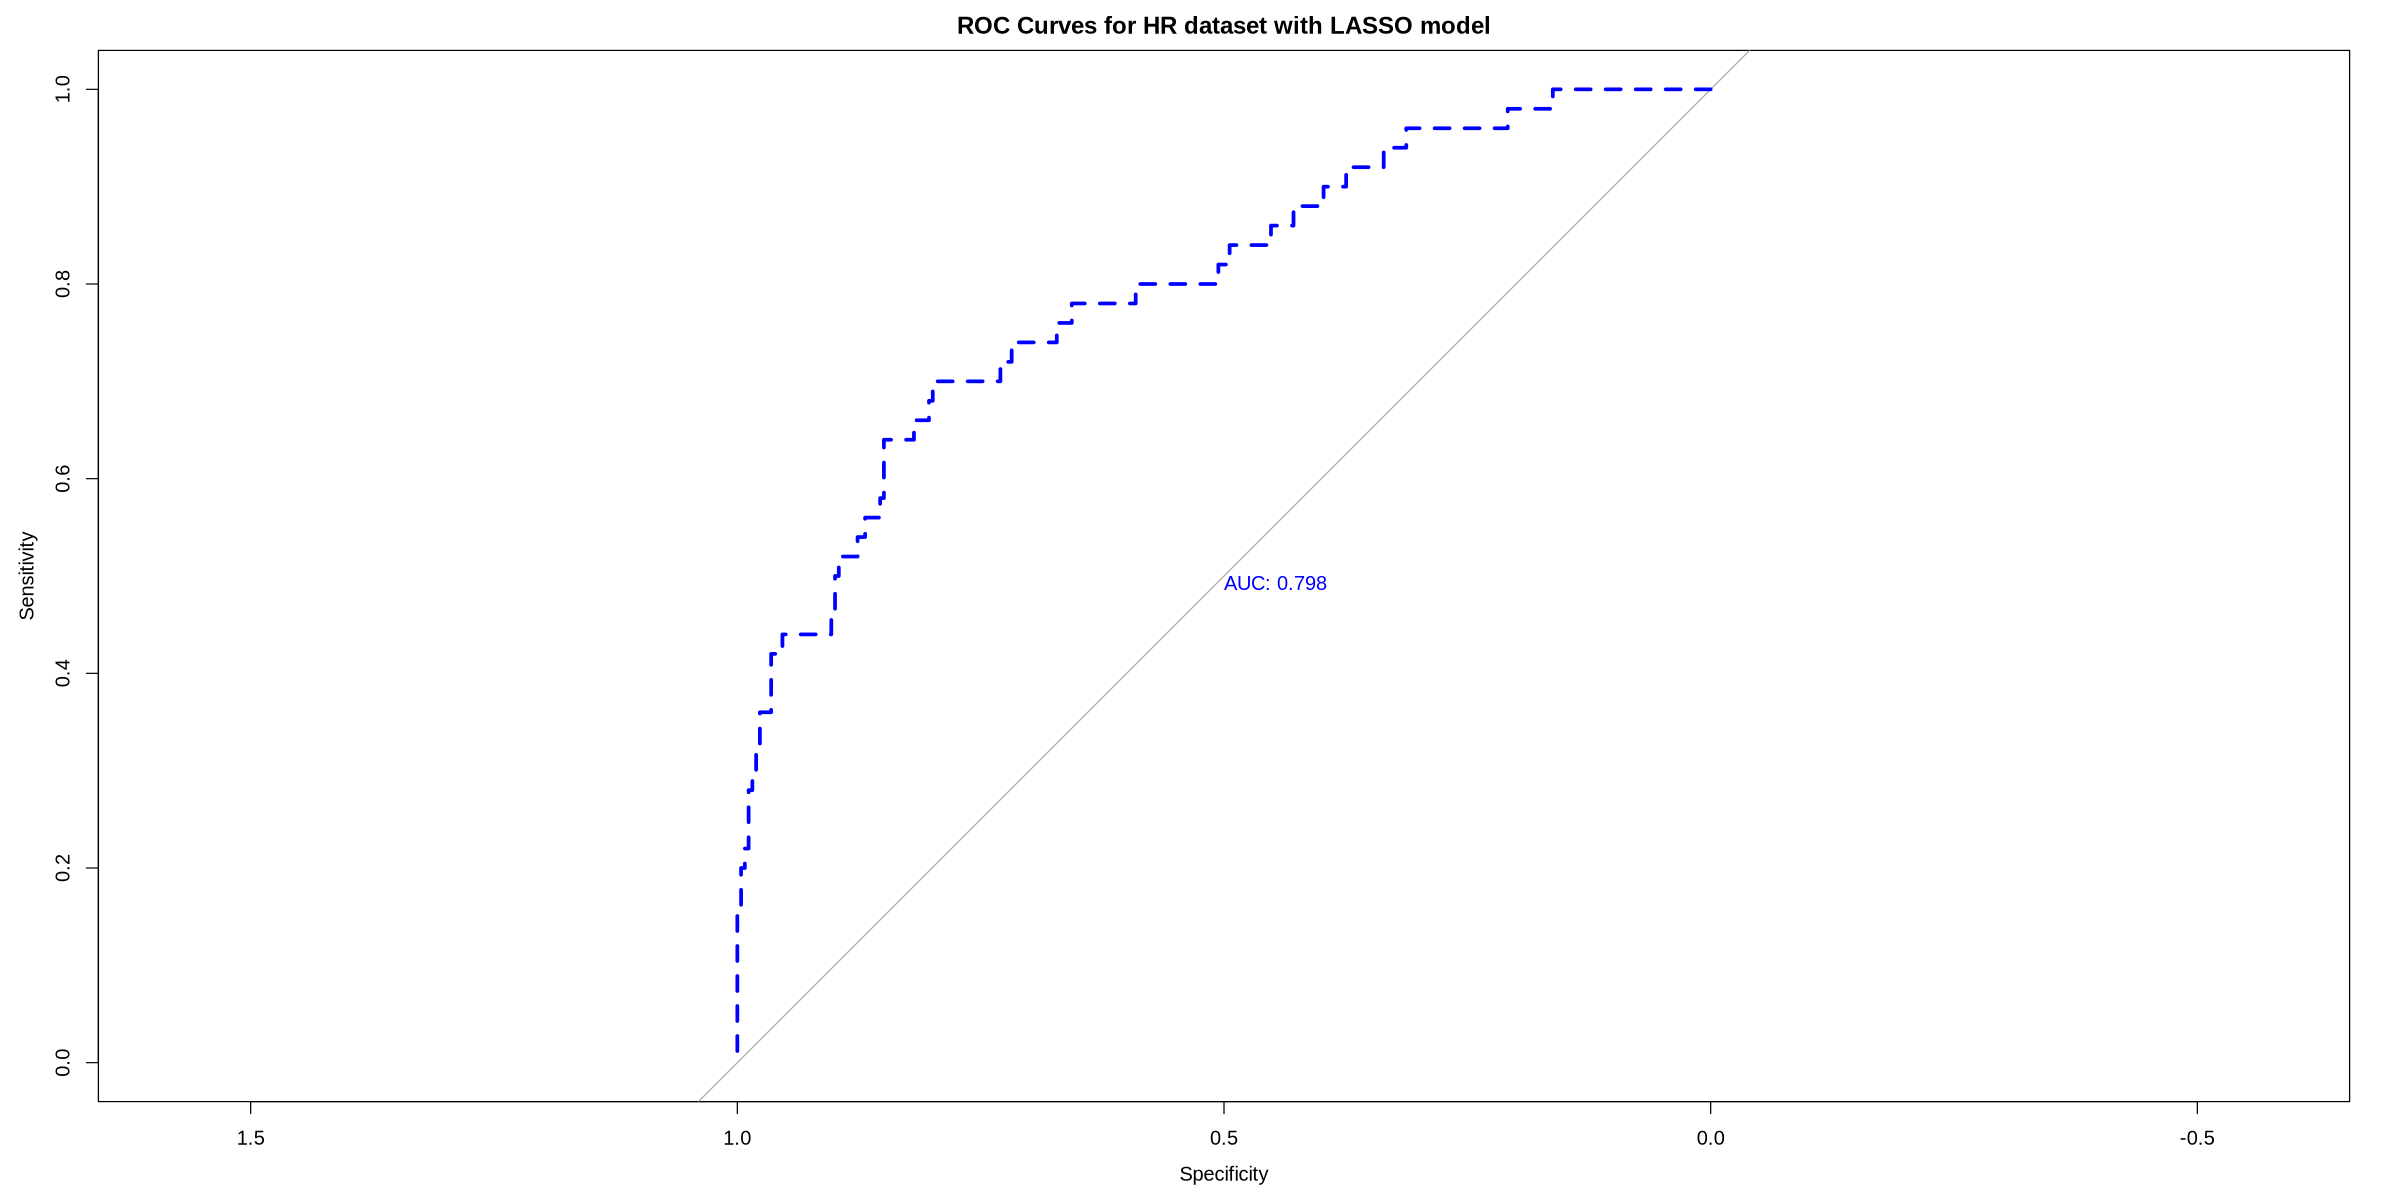

In [28]:
#display the confusion matrix for the LASSO model
HR_LASSO_confusion_matrix <- 
    confusionMatrix(
    data = as.factor(round(predict(HR_LASSO_selected_model, HR_validate_selected, type = 'response'), 0)),
    reference = as.factor(HR_validate_selected$Attrition),
    positive = '1'
)
HR_LASSO_confusion_matrix

#plot the ROC for the LASSO model
ROC_LASSO_log <- roc(
  response = HR_validate_selected$Attrition,
  predictor = predict(HR_LASSO_selected_model, HR_validate_selected, type = 'response')
)
plot(ROC_LASSO_log,
  print.auc = TRUE, col = "blue", lwd = 3, lty = 2,
  main = "ROC Curves for HR dataset with LASSO model"
)

We can see that with our lasso model, we get an AUC of 0.798 and an accuracy of 0.8706. While still not amazing, our LASSO model is clearly better than our selected model. Once again, we will leave a note about different thresholds being a potetnail better choice, but we will refrain from going through the exercise again until we have selected our final model.

#### Model 3: Variables Selected by a Forward Selection Algorithm

The final model we will consider is one with variables selected by a forward selection algorithm. Using the stepAIC package, we can perform forward selection for logistic regression.

In [29]:
# Use stepAIC for the forward selection
set.seed(19)

null_model <- glm(Attrition ~ 1, data = HR_train, family = binomial)

full_model <- glm(Attrition ~ ., data = HR_train, family = binomial)

HR_step_model <- stepAIC(null_model, direction = "forward", scope = list(lower = null_model, upper = full_model))

Start:  AIC=634.11
Attrition ~ 1

                           Df Deviance    AIC
+ OverTime                  1   590.79 594.79
+ Age                       1   603.01 607.01
+ JobRole                   8   594.58 612.58
+ JobLevel                  1   609.50 613.50
+ TotalWorkingYears         1   609.87 613.87
+ YearsWithCurrManager      1   610.04 614.04
+ MonthlyIncome             1   610.10 614.10
+ StockOptionLevel          1   614.85 618.85
+ EnvironmentSatisfaction   1   616.96 620.96
+ YearsInCurrentRole        1   618.40 622.40
+ YearsAtCompany            1   618.96 622.96
+ MaritalStatus             2   617.61 623.61
+ EducationField            5   616.05 628.05
+ JobInvolvement            1   625.32 629.32
+ JobSatisfaction           1   626.05 630.05
+ TrainingTimesLastYear     1   626.44 630.44
+ Gender                    1   628.49 632.49
+ BusinessTravel            2   626.57 632.57
+ DistanceFromHome          1   629.25 633.25
+ RelationshipSatisfaction  1   629.62 633.62


In [30]:
#find the best model from the algorithm/
summary(HR_step_model)


Call:
glm(formula = Attrition ~ OverTime + Age + EnvironmentSatisfaction + 
    YearsWithCurrManager + StockOptionLevel + JobSatisfaction + 
    EducationField + DistanceFromHome + Gender + RelationshipSatisfaction + 
    JobInvolvement + BusinessTravel + NumCompaniesWorked + YearsSinceLastPromotion + 
    MonthlyIncome + TrainingTimesLastYear, family = binomial, 
    data = HR_train)

Coefficients:
                                  Estimate Std. Error z value Pr(>|z|)    
(Intercept)                      3.812e+00  1.256e+00   3.035 0.002404 ** 
OverTimeYes                      1.780e+00  2.617e-01   6.801 1.04e-11 ***
Age                             -5.799e-02  1.751e-02  -3.312 0.000927 ***
EnvironmentSatisfaction         -5.419e-01  1.159e-01  -4.675 2.93e-06 ***
YearsWithCurrManager            -1.734e-01  5.065e-02  -3.423 0.000620 ***
StockOptionLevel                -6.494e-01  1.682e-01  -3.861 0.000113 ***
JobSatisfaction                 -3.382e-01  1.132e-01  -2.987 0.002821 

Now that we have a model, we can assess its performance using a confusion matrix and ROC

Confusion Matrix and Statistics

          Reference
Prediction   0   1
         0 247  30
         1  12  20
                                          
               Accuracy : 0.8641          
                 95% CI : (0.8207, 0.9003)
    No Information Rate : 0.8382          
    P-Value [Acc > NIR] : 0.121916        
                                          
                  Kappa : 0.4138          
                                          
 Mcnemar's Test P-Value : 0.008712        
                                          
            Sensitivity : 0.40000         
            Specificity : 0.95367         
         Pos Pred Value : 0.62500         
         Neg Pred Value : 0.89170         
             Prevalence : 0.16181         
         Detection Rate : 0.06472         
   Detection Prevalence : 0.10356         
      Balanced Accuracy : 0.67683         
                                          
       'Positive' Class : 1               
                              

Setting levels: control = 0, case = 1

Setting direction: controls < cases



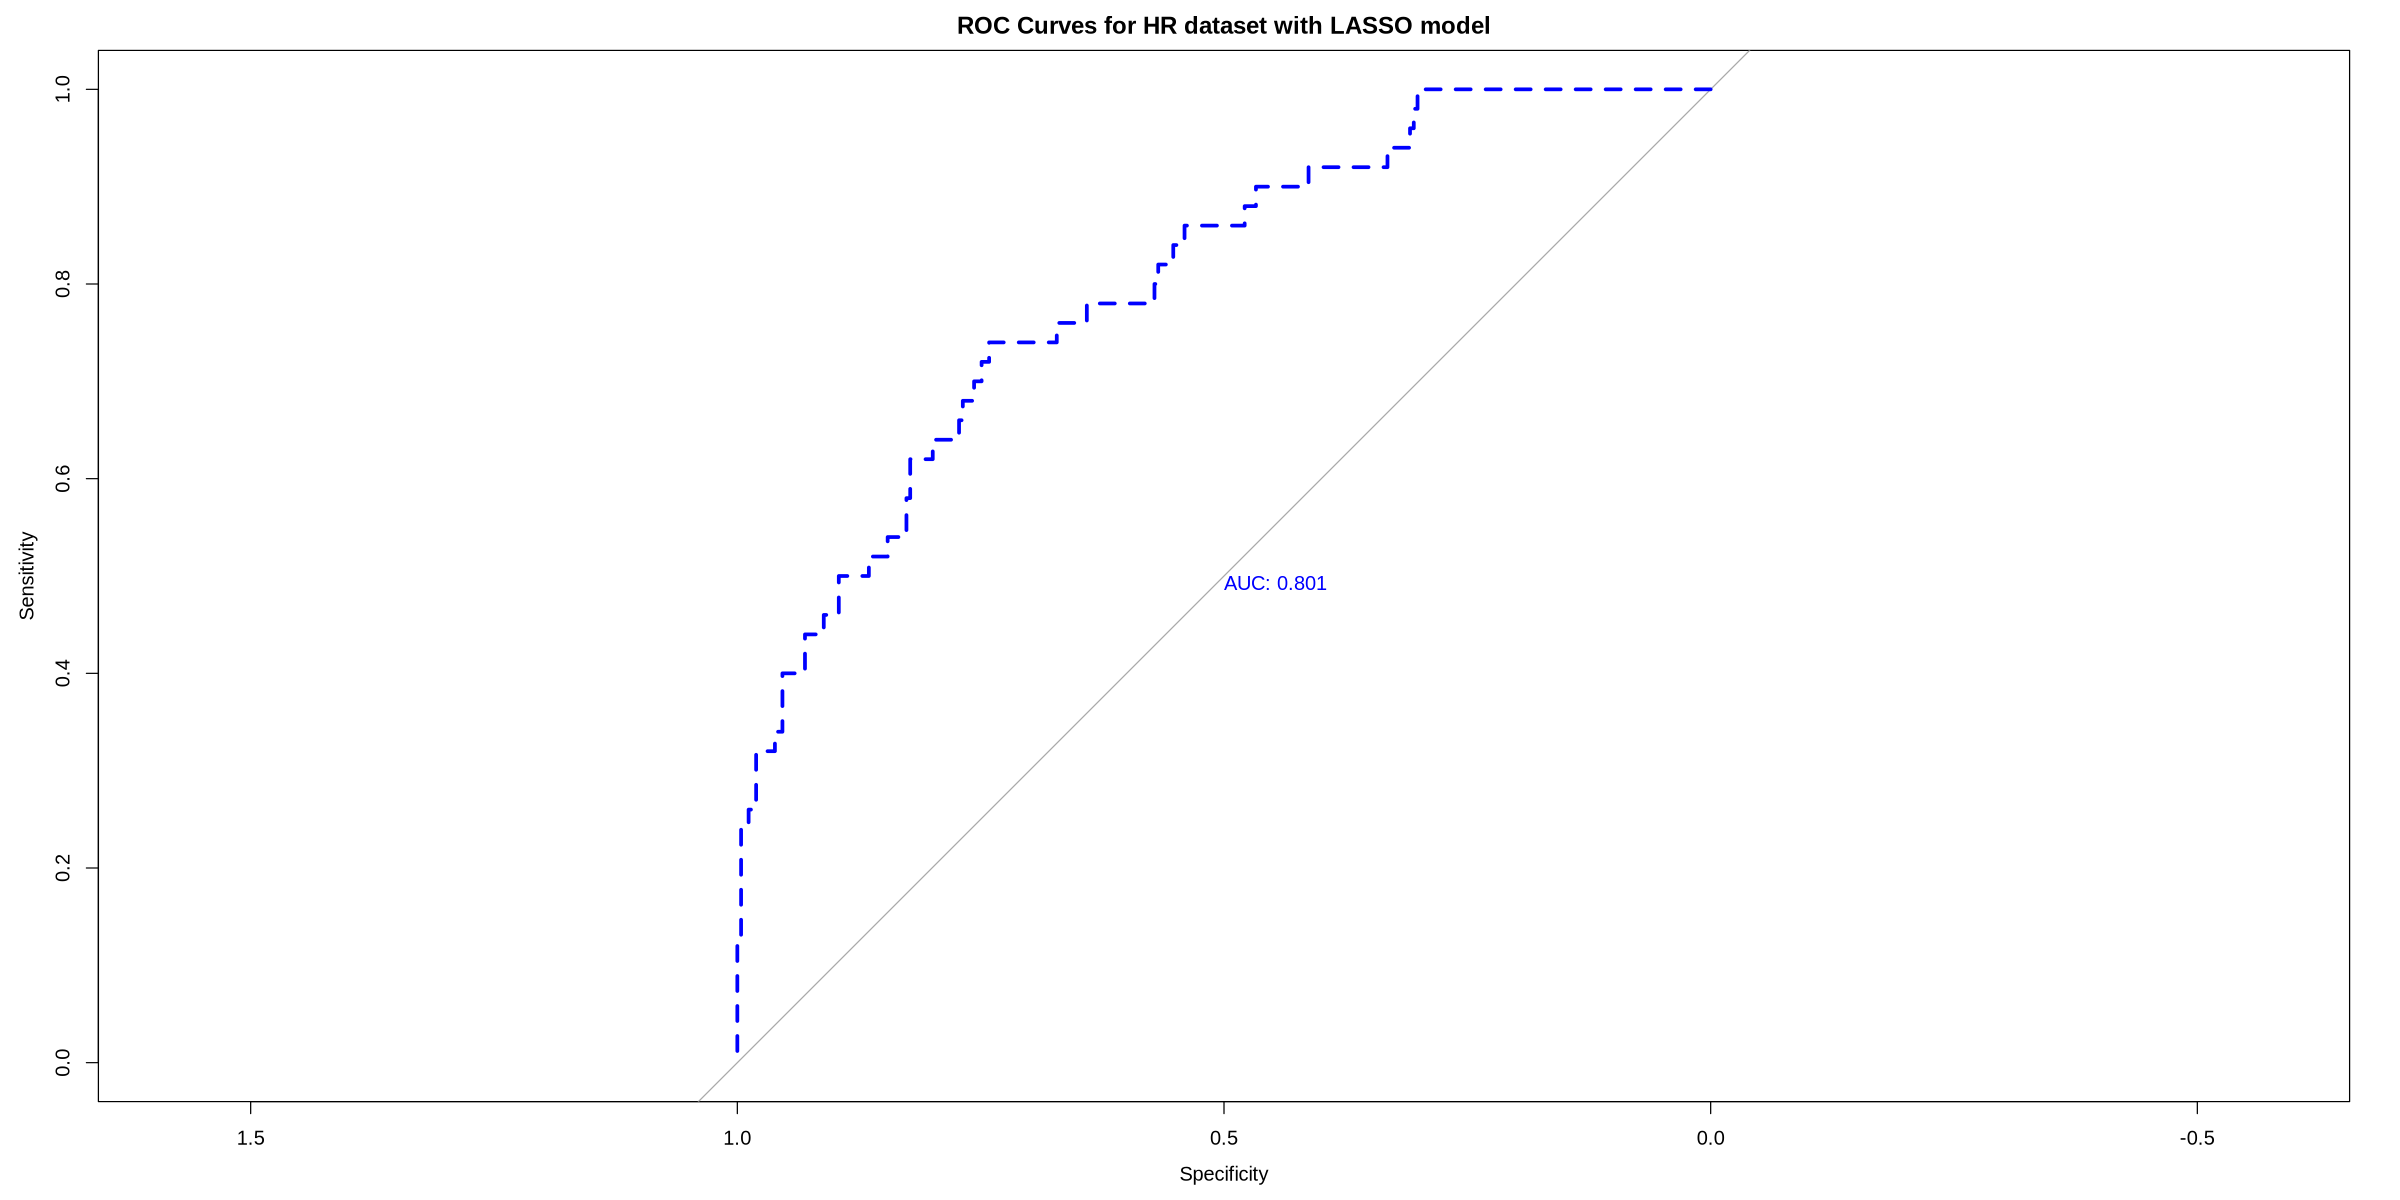

In [31]:
#display the confusion matrix for the forward selection model
HR_step_confusion_matrix <- 
    confusionMatrix(
    data = as.factor(round(predict(HR_step_model, HR_validate, type = 'response'), 0)),
    reference = as.factor(HR_validate$Attrition),
    positive = '1'
)
HR_step_confusion_matrix

#plot the ROC for the forward selection model
ROC_step_log <- roc(
  response = HR_validate$Attrition,
  predictor = predict(HR_step_model, HR_validate, type = 'response')
)
plot(ROC_step_log,
  print.auc = TRUE, col = "blue", lwd = 3, lty = 2,
  main = "ROC Curves for HR dataset with LASSO model"
)

For our forward selection model we get an AUC of 0.801 and an accuracy of 0.8641 at a 0.5 threshold. While the AUC is slightly better than the LASSO selected model, the accuracy is actually worse at the threshold. While the AUC is a better measure overall, it is worth pointing out that if a certain threshold is desired for an external reason, eg if we know that we want to be more lenient and spend more resources on preventing attrition and therefore a lower threshold, or vice versa if we want to be stricter and make sure we are only spending resources on employees who are extremely likely to leave ahave nd therefore want a higher threshold.

Additionally, its worth noting that some of the coefficients identified by stepAIC have high p-values. That is, there isn't enough evidence that those variables are statistically significant. Mainly, the education field variables are uncertain. For now, we will leave the model as is, since the variables were still identified as relevant earlier in our analysis.

### (6) Model Selection and Discussion

As previously discussed, the forward selection algorithm had the best AUC, and so we will pick that as our official model. Now, we must evaluate our model's performance on the testing data.

Confusion Matrix and Statistics

          Reference
Prediction   0   1
         0 361  41
         1   9  31
                                          
               Accuracy : 0.8869          
                 95% CI : (0.8536, 0.9149)
    No Information Rate : 0.8371          
    P-Value [Acc > NIR] : 0.001971        
                                          
                  Kappa : 0.4948          
                                          
 Mcnemar's Test P-Value : 1.165e-05       
                                          
            Sensitivity : 0.43056         
            Specificity : 0.97568         
         Pos Pred Value : 0.77500         
         Neg Pred Value : 0.89801         
             Prevalence : 0.16290         
         Detection Rate : 0.07014         
   Detection Prevalence : 0.09050         
      Balanced Accuracy : 0.70312         
                                          
       'Positive' Class : 1               
                              

Setting levels: control = 0, case = 1

Setting direction: controls < cases



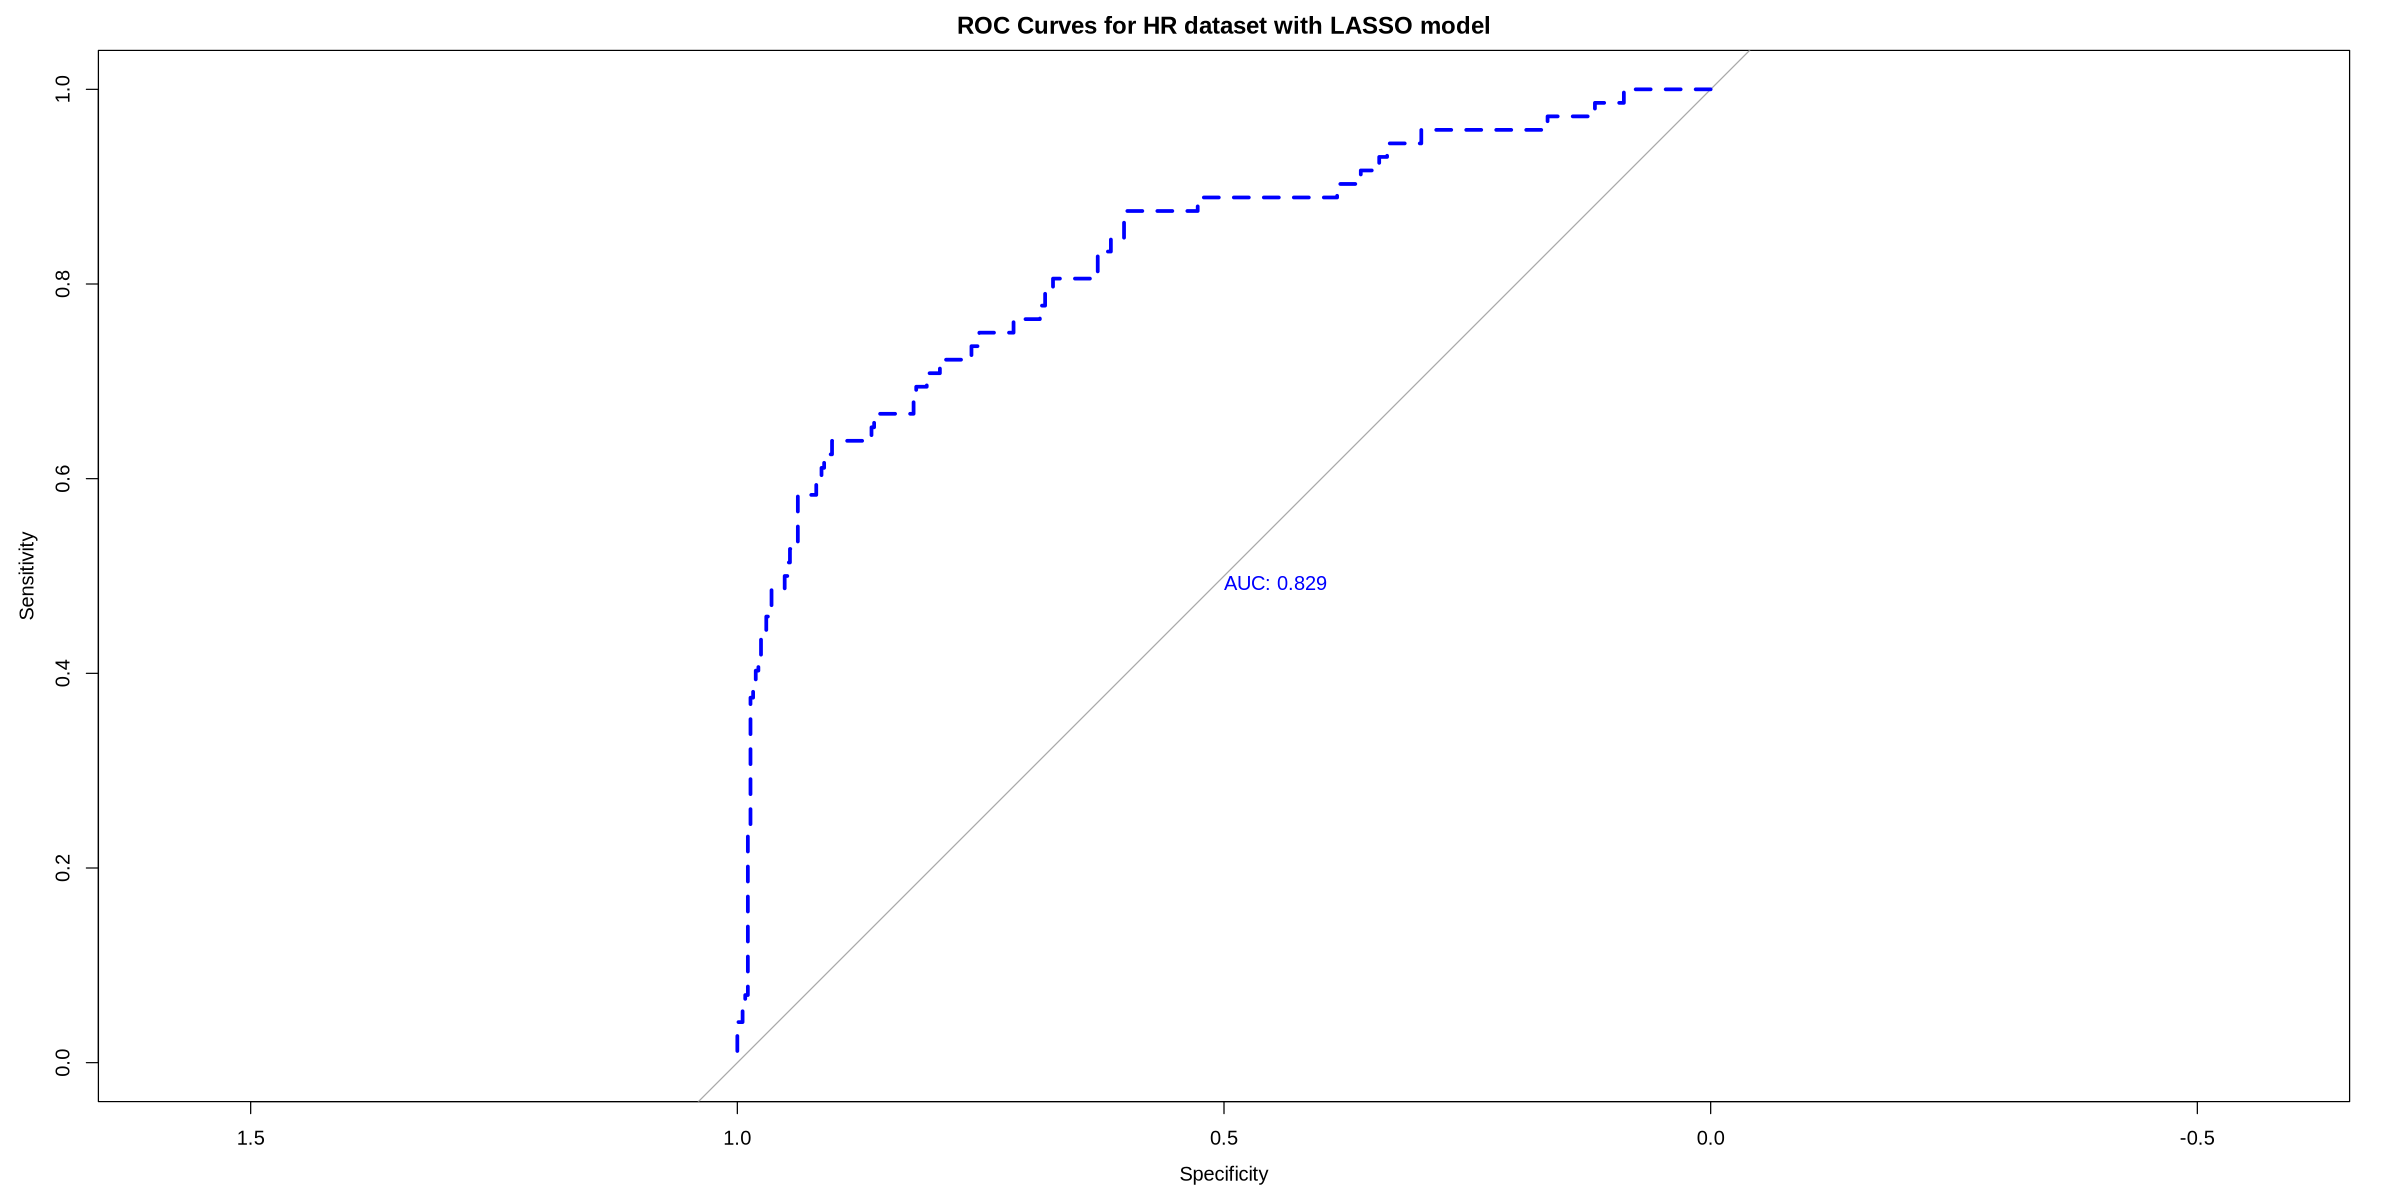

In [35]:
#display the confusion matrix for the forward selection model on the testing data
HR_step_confusion_matrix <- 
    confusionMatrix(
    data = as.factor(round(predict(HR_step_model, HR_test, type = 'response'), 0)),
    reference = as.factor(HR_test$Attrition),
    positive = '1'
)
HR_step_confusion_matrix

#plot the ROC for the forward selection model on the testing data
ROC_step_log <- roc(
  response = HR_test$Attrition,
  predictor = predict(HR_step_model, HR_test, type = 'response')
)
plot(ROC_step_log,
  print.auc = TRUE, col = "blue", lwd = 3, lty = 2,
  main = "ROC Curves for HR dataset with LASSO model"
)

As we can see, the model is actually performing better on the testing set in terms of both AUC and accuracy with a 0.5 threshold. The AUC is 0.829 and the accuracy is 0.887. While it is surprising that the model is performing better on the test data, this is likely just random chance that the data split happened to be similar enough. Overall, the model is performing well enough on the test data to be considered successful.

Our chosen model employing forward selection utilized 16 distinct covariates, but included 20 features when accounting for categorical variables. This yielded some interesting analysis. For example, two ofthe highest coefficients were for `OvertimeYes` and `BusinessTravelFrequently`. This is likely because the more employees are required to do for their job, the more likely they are to get burnt out and want to leave. Another interesting covariate was the `Education` variable. The model selected 4 different fields, as well as other, which it deemed to be sufficiently correlated to our target prediction. However, what we found was that these fields were correlated to attrition in vastly different ways. Marketing and Techincal Fields had a strong positive coefficient, indicating that these are likely to be fields with high turnover, while Life sciences and Medical fields have negative coefficients, indicating that those employees are more likely to stay. With this information, companies can spend their resources more on the fields that have higher turnover.

One area of improvement from the current model would be optimizing the threshold. This would be company dependent based on their goals and how big this issue is for them, but some analysis can be taken from analyzing the confusion matrix and ROC plot. We can see that the model has a flatter edge along the specificity axis, indicating that it is easier to get a threshold that correctly identifies attrition without having too many false positives than it is to get a threshold that correctly identifies employees that want to stay without assigning false negatives. This is ideal for companies who want to be able to prevent attrition as much as possible since it will help them identify the employees who are likely to leave, while it isn't as great for companies who want to spend as few resources as possible.

### Citations

1) Flowers, Vincent S, and Charles L Hughes. “Why Employees Stay.” Harvard Business Review, 1 Aug. 2014, hbr.org/1973/07/why-employees-stay. 

2) Kanchana, Lakshmi, and Ruwan Jayathilaka. “Factors Impacting Employee Turnover Intentions among Professionals in Sri Lankan Startups.” PloS One, U.S. National Library of Medicine, 10 Feb. 2023, www.ncbi.nlm.nih.gov/pmc/articles/PMC9916568/. 